This is the start
dt/dy=ky(1−y) 
where:
y is the goal likelihood (a value between 0 and 1)
t is time
k is a growth rate constant

Add in domain information
distance_to_goal and shot_type
dt/dy = k * y * (1 - y) * (1 - distance_to_goal / 100) * (1 + 0.2 * shot_type)

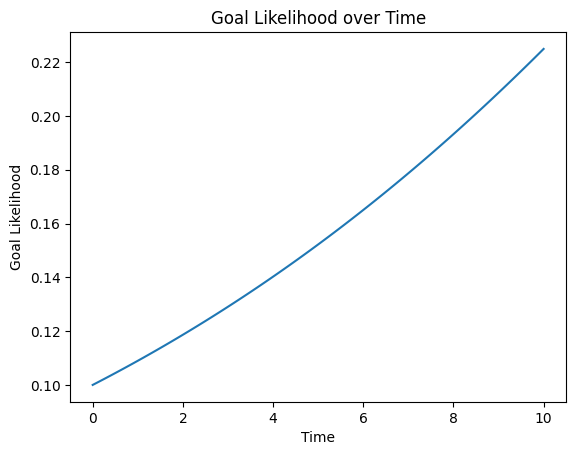

In [5]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE for logistic growth
# t is time, y is goal likelyhood, k is the growth rate
# distance_to_goal and shot_type is self explanitory 
def logistic_growth_with_features(t, y, k, distance_to_goal, shot_type):
    if shot_type == 1:
        dydt = k * y * (1 - y) * (1 - distance_to_goal / 100) * (1 + 0.2)
        return dydt
    else:
        dydt = k * y * (1 - y) * (1 - distance_to_goal / 100) * (1 - 0.2)
        return dydt

# Sample data for distance_to_goal and shot_type
distance_to_goal = 20  # average distance
shot_type = 1  # 1 is wrist shot, 2 is slap shot

# Initial goal likelihood
initial_goal_likelihood = 0.1

# Set the growth rate constant (you may need to adjust this based on your data)
growth_rate_constant = 0.1

t_span = (0, 10) 
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODE
solution = solve_ivp(
    logistic_growth_with_features, 
    t_span, 
    [initial_goal_likelihood], 
    args=(growth_rate_constant, distance_to_goal, shot_type), 
    t_eval=t_eval
)
# Plot the results
plt.plot(solution.t, solution.y[0])
plt.xlabel('Time')
plt.ylabel('Goal Likelihood')
plt.title('Goal Likelihood over Time')
plt.show()
